In [1]:
# import SymPy and define symbols
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r') # resonator frequency
wq = sp.Symbol('\omega_q') # qubit frequency
g = sp.Symbol('g', real=True) # vacuum Rabi coupling
Delta = sp.Symbol('Delta', real=True) # wr - wq; defined later

In [2]:
# import operator relations and define them
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a') # resonator photon annihilation operator
from sympy.physics.quantum import pauli, Dagger, Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form

# Pauli matrices
sx = pauli.SigmaX()
sy = pauli.SigmaY()
sz = pauli.SigmaZ()

# qubit raising and lowering operators, notice the spin and qubit ladder operators are inversed
splus = pauli.SigmaMinus()
sminus = pauli.SigmaPlus()

In [4]:
# define J-C Hamiltonian in terms of diagonal and non-block diagonal terms
H0 = wr*Dagger(a)*a - (1/2)*wq*sz; 
H2 = g*(Dagger(a)*sminus + a*splus); 
HJC = H0 + H2; HJC # print

In [5]:
# using the above method for finding the ansatz
eta = Commutator(H0, H2); eta

In [6]:
pauli.qsimplify_pauli(normal_ordered_form(eta.doit().expand()))

In [7]:
A = sp.Symbol('A')
B = sp.Symbol('B')
eta = A * Dagger(a) * sminus - B * a * splus;
pauli.qsimplify_pauli(normal_ordered_form(Commutator(H0, eta).doit().expand()))

In [8]:
H2

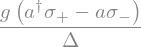

In [9]:
S1 = eta.subs(A, g/Delta)
S1 = S1.subs(B, g/Delta); S1.factor()

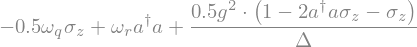

In [10]:
Heff = H0 + 0.5*pauli.qsimplify_pauli(normal_ordered_form(Commutator(H2, S1).doit().expand())).simplify(); Heff